In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
from plotly.offline import init_notebook_mode, plot, iplot
import os
import sys
sb.set()

In [39]:
dparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %I-%p")
df = pd.read_csv("D:\Open Classroom\Ethereum\ETH_1h.csv", parse_dates = ["Date"], date_parser = dparser)
pd.set_option("display.max_rows", 100)
df.drop(columns = ["Unnamed: 0"], inplace = True)
df

<ipython-input-39-d2f0ac055eeb>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %I-%p")


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [40]:
#df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d %I-%p")
df.loc[0, "Date"]

Timestamp('2020-03-13 20:00:00')

In [41]:
df["WeekDay"] = df["Date"].dt.day_name()
df

,Date,Symbol,Open,High,Low,Close,Volume,WeekDay
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


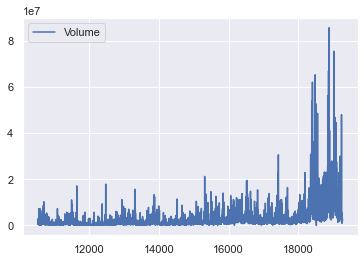

In [42]:
dateFilt = (df["Date"] >= pd.to_datetime("2018-01-01")) & (df["Date"] < pd.to_datetime("2018-12-31"))
df[dateFilt]
%matplotlib inline
df.loc[dateFilt, ["Volume"]].plot()

In [43]:
df.set_index("Date", inplace = True)
df

,Symbol,Open,High,Low,Close,Volume,WeekDay
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [60]:
dateMax = df["High"].resample("m").max().head(10)
dateMax

Date
2017-07-31     293.73
2017-08-31     392.00
2017-09-30     396.88
2017-10-31     350.00
2017-11-30     518.13
2017-12-31     875.00
2018-01-31    1419.96
2018-02-28    1143.00
2018-03-31     878.00
2018-04-30     711.00
Freq: M, Name: High, dtype: float64

In [65]:
dateSlice = df["2018-01-01": "2018-12-31"].sort_index(ascending = True)
dateSlice

,Symbol,Open,High,Low,Close,Volume,WeekDay
Date,,,,,,,
2018-01-01 00:00:00,ETHUSD,741.27,741.27,733.69,734.59,2697546.48,Monday
2018-01-01 01:00:00,ETHUSD,734.59,735.10,730.01,730.02,1886624.01,Monday
2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday
2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,ETHUSD,134.83,134.90,128.50,131.17,3380282.07,Monday
2018-12-31 20:00:00,ETHUSD,131.17,131.58,130.36,130.90,1775465.69,Monday
2018-12-31 21:00:00,ETHUSD,130.90,130.90,129.47,129.97,1079617.65,Monday


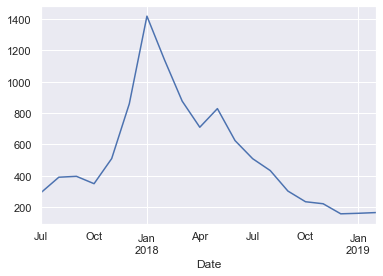

In [54]:
monthSample = df["Open"].resample("M").max().head(20)
monthSample.plot()

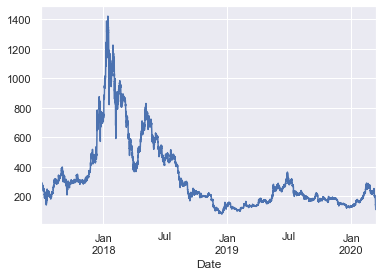

In [67]:
daySample = df["High"].resample("h").max()
daySample.plot()

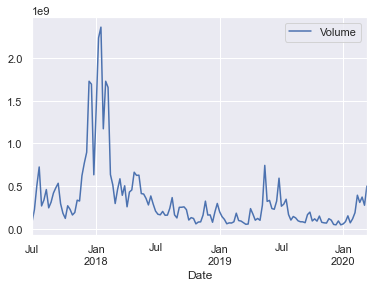

In [71]:
dfSample = df.resample("w").agg({"Volume": "sum"})
dfSample.plot()

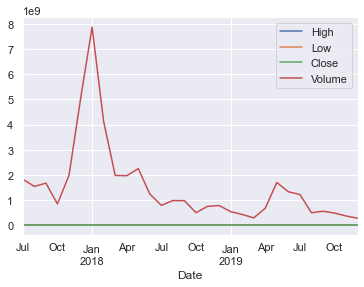

In [75]:
dfSample = df.resample("bm").agg({"High": "max", "Low": "min", "Close": "mean", "Volume": "sum"})
dfSample["2017": "2019"].plot(legend = "Volume")